# Artificial Neural Networks and Deep Learning

---

## Lecture 1: Feedforward Neural Networks

### 🌐 Connect Colab to Google Drive

In [164]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Lecture 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/[2024-2025] AN2DL/Lecture 1


### ⚙️ Import Libraries

In [165]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


### ⏳ Load Data

In [166]:
# Load Data
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('penguins.csv')

Data already downloaded. Using cached data...


### 🔎 Inspect Data

In [167]:

# Display the first 10 rows of the Penguin dataset
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [168]:
# Print the shape of the Penguin dataset
print('Penguin dataset shape', dataset.shape)

# Generate summary statistics for the Penguin dataset
dataset.describe()

Penguin dataset shape (344, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [171]:
#remove nan values
dataset = dataset.dropna()

In [172]:
# Get the target values from the Penguin dataset
target = dataset.species
print('Target shape', target.shape)

# Get the feature values from the Penguin dataset
features = dataset.drop('species', axis=1)
print('Features shape', features.shape)

Target shape (333,)
Features shape (333, 6)


In [173]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


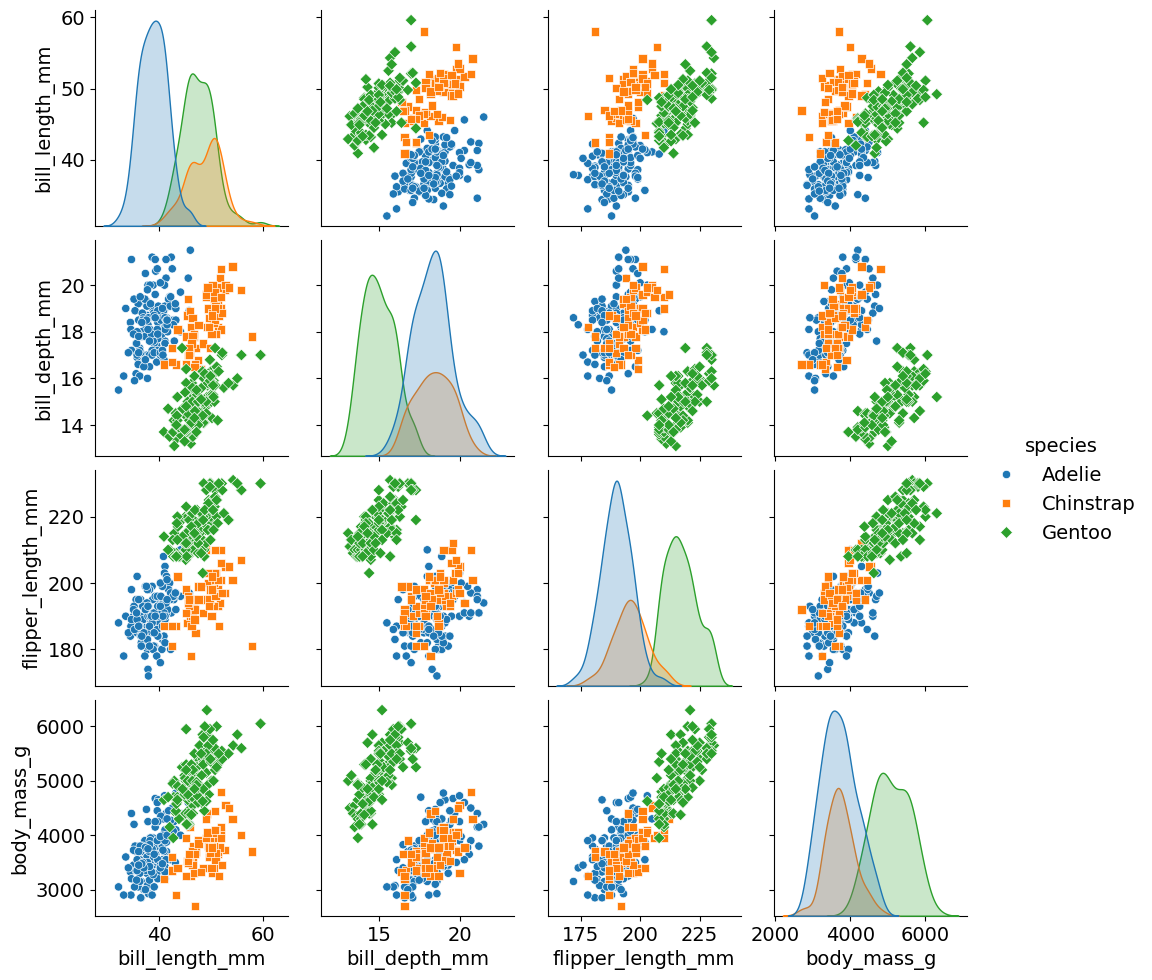

In [174]:
# Copy the Penguin dataset
plot_dataset = dataset.copy()

# Assign target labels to the dataset
plot_dataset["species"] = target

# Plot using seaborn pairplot
sns.pairplot(plot_dataset, hue="species", palette="tab10", markers=["o", "s", "D"])
plt.show()

# Clean up by deleting the temporary dataset
del plot_dataset

#### Split in train, validation and test

In [175]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    dataset,
    target,
    test_size=33,
    random_state=seed,
    stratify=target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=60,
    random_state=seed,
    stratify=y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (240, 7) (240,)
Validation set shape:	 (60, 7) (60,)
Test set shape:		 (33, 7) (33,)


In [176]:
X_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,MALE
263,Gentoo,Biscoe,49.6,15.0,216.0,4750.0,MALE
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE


In [177]:
#to onehot Feature
X_train = pd.get_dummies(X_train, columns=['island','sex'], dtype=int)
X_val = pd.get_dummies(X_val, columns=['island','sex'], dtype=int)
X_test = pd.get_dummies(X_test, columns=['island','sex'], dtype=int)

In [178]:
#to_onehot label
y_train = pd.get_dummies(y_train, columns=['species'], dtype=int)
y_val = pd.get_dummies(y_val, columns=['species'], dtype=int)
y_test = pd.get_dummies(y_test, columns=['species'], dtype=int)

### 🔄 Process Data

In [179]:
#drop species
X_train = X_train.drop('species', axis=1)
X_val = X_val.drop('species', axis=1)
X_test = X_test.drop('species', axis=1)

In [180]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
23,38.2,18.1,185.0,3950.0,1,0,0,0,1
263,49.6,15.0,216.0,4750.0,1,0,0,0,1
160,46.0,18.9,195.0,4150.0,0,1,0,1,0
309,52.1,17.0,230.0,5550.0,1,0,0,0,1
13,38.6,21.2,191.0,3800.0,0,0,1,0,1


In [181]:
from sklearn.preprocessing import StandardScaler
categorical_columns = ['sex','island']
numerical_columns = ['bill_length_mm', 	'bill_depth_mm', 	'flipper_length_mm', 	'body_mass_g']
#normalize the training set
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
#normalize the validation set
scaler = StandardScaler()
X_val[numerical_columns] = scaler.fit_transform(X_val[numerical_columns])
#normalize the test set
scaler = StandardScaler()
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])

In [182]:
# Display summary statistics of the normalised training data
X_train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000
mean,-1.110223e-17,8.289665e-16,8.437695e-16,-3.885781e-16,0.483333,0.379167,0.137500,0.475000,0.525000
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00,0.500766,0.486194,0.345094,0.500418,0.500418
min,-2.157861e+00,-2.043698e+00,-1.967113e+00,-1.746919e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.782914e-01,-8.567122e-01,-8.073226e-01,-8.012185e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.860557e-02,8.038185e-02,-2.636710e-01,-2.022748e-01,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.986380e-01,7.550896e-01,8.598756e-01,6.488556e-01,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.815732e+00,2.004548e+00,2.164639e+00,2.288070e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
23,-1.054628,0.455219,-1.169757,-0.359892,1,0,0,0,1
263,1.007153,-1.094109,1.077336,0.648856,1,0,0,0,1
160,0.356064,0.855046,-0.444888,-0.107705,0,1,0,1,0
309,1.459298,-0.094542,2.092152,1.657603,1,0,0,0,1
13,-0.982285,2.004548,-0.734836,-0.549032,0,0,1,0,1


In [184]:
y_train.head()

,Adelie,Chinstrap,Gentoo
23,1,0,0
263,0,0,1
160,0,1,0
309,0,0,1
13,1,0,0


In [185]:
# Determine the input shape, corresponding to the number of features
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape, corresponding to the number of classes
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (9,)
Output shape of the network 3


### 🧮 Define Network Parameters

In [186]:
# Batch size: number of samples processed in each training iteration
batch_size = 16

# Number of epochs: times the entire dataset is passed through the network during training
epochs = 500

# Learning rate: step size for updating the model's weights
learning_rate = 0.01

### 🛠️ Build the Model

In [187]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    inputs = tfkl.Input(shape=input_shape, name='Input')

    # Add hidden layer with ReLU activation
    x = tfkl.Dense(units=16, name='Hidden')(inputs)
    x = tfkl.Activation('relu', name='HiddenActivation')(x)
    x = tfkl.Dropout(rate=0.1, name='HiddenDropout')(x)

    # Add output layer with softmax activation
    x = tfkl.Dense(units=output_shape, name='Output')(x)
    outputs = tfkl.Activation('softmax', name='Softmax')(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=inputs, outputs=outputs, name='FeedforwardNeuralNetwork')

    # Compile the model with loss, optimizer, and metrics
    loss = tfk.losses.CategoricalCrossentropy()
    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 9)                    │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Hidden (Dense)                      │ (None, 16)                   │           160 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenActivation (Activation)       │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenDropout (Dropout)             │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 3)                    │            51 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Softmax (Activation)                │ (None, 3)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

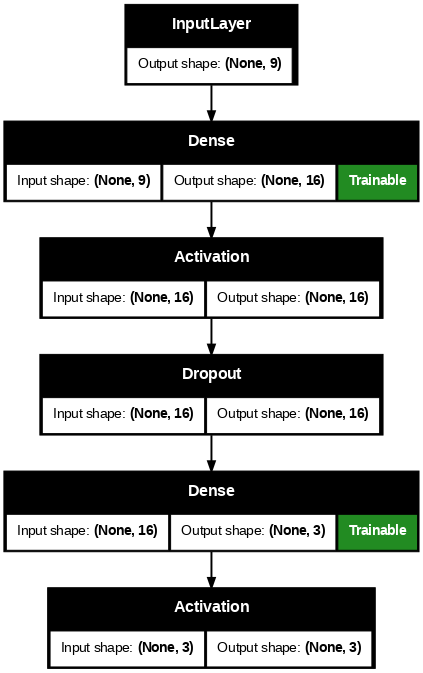

In [188]:
# Build the model with specified input and output shapes
model = build_model()

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

### 🧠 Train the Model

In [189]:
# Train the model and store the training history
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks = tfk.callbacks.EarlyStopping(monitor='loss', patience=3)
).history

# Calculate the final validation accuracy
final_val_accuracy = round(history['val_accuracy'][-1] * 100, 2)

# Save the trained model to a file with the accuracy included in the filename
model_filename = f'Penguin_Feedforward_{final_val_accuracy}.keras'
model.save(model_filename)

# Delete the model to free up memory resources
del model

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4458 - loss: 1.0086 - val_accuracy: 0.8167 - val_loss: 0.4288
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8557 - loss: 0.3780 - val_accuracy: 0.9167 - val_loss: 0.2038
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9246 - loss: 0.2118 - val_accuracy: 0.9833 - val_loss: 0.0884
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9679 - loss: 0.1230 - val_accuracy: 0.9833 - val_loss: 0.0474
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0721 - val_accuracy: 1.0000 - val_loss: 0.0309
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9734 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9743 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9868 - loss: 0.0313 - val_accuracy: 1.0000 - 

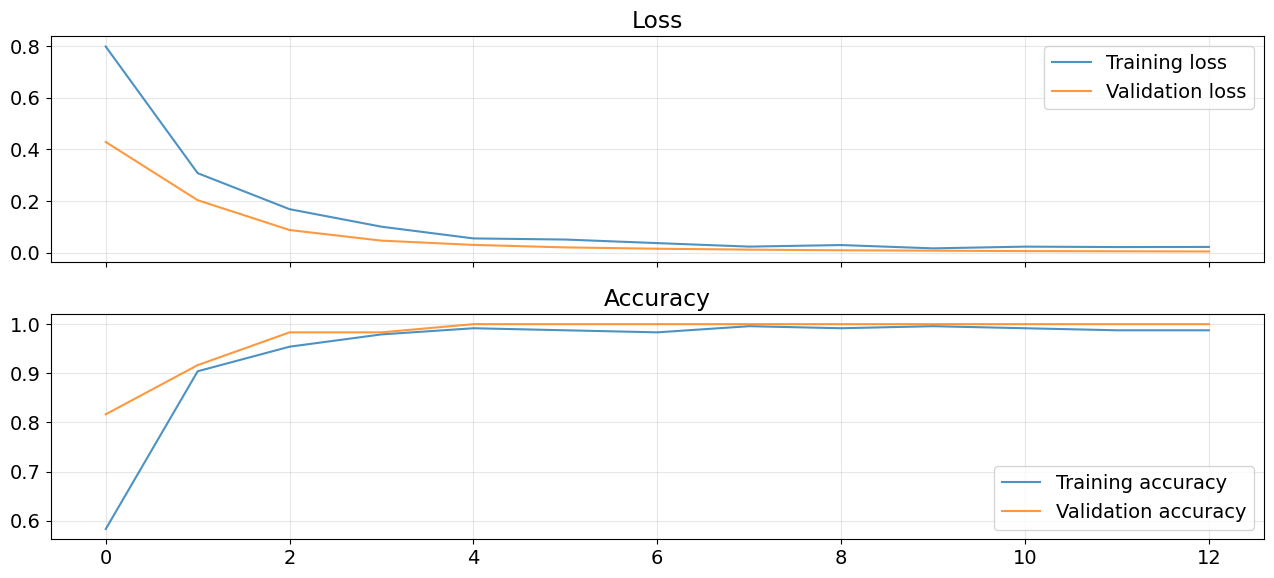

In [190]:
# Create a figure with two vertically stacked subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)

# Plot training and validation loss
ax1.plot(history['loss'], label='Training loss', alpha=.8)
ax1.plot(history['val_loss'], label='Validation loss', alpha=.8)
ax1.set_title('Loss')
ax1.legend()
ax1.grid(alpha=.3)

# Plot training and validation accuracy
ax2.plot(history['accuracy'], label='Training accuracy', alpha=.8)
ax2.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
ax2.set_title('Accuracy')
ax2.legend()
ax2.grid(alpha=.3)

# Adjust the layout and display the plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

### 🕹️ Use the Model - Make Inference

**Binary Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1dUVBtRp6yJmfr1-cwUmWtKX2UfgozNaj" width="250"/>

$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

&nbsp;

---

**Multiclass Classification Metrics**

<img src="https://drive.google.com/uc?export=view&id=1yDfrbcjHPTqFx9P5ZPhi07S5XVcXjd6g" width="300"/>

$\text{Accuracy} = \sum_{i=1}^{N} \frac{TP_i}{TP_i + TN_i + FP_i + FN_i}$

$\text{Precision}_i = \frac{TP_i}{TP_i + FP_i}$

$\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}$

$F1_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}$

&nbsp;

**Macro Averaging**

$\text{Precision}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_i$

$\text{Recall}_{macro} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_i$

$F1_{macro} = \frac{1}{N} \sum_{i=1}^{N} F1_i$

&nbsp;

**Weighted Macro Averaging**

$\text{Precision}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Precision}_i \right)$

$\text{Recall}_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times \text{Recall}_i \right)$

$F1_{weighted} = \sum_{i=1}^{N} \left( \frac{N_i}{N} \times F1_i \right)$


Model: "FeedforwardNeuralNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Input (InputLayer)                  │ (None, 9)                    │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Hidden (Dense)                      │ (None, 16)                   │           160 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenActivation (Activation)       │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ HiddenDropout (Dropout)             │ (None, 16)                   │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Output (Dense)                      │ (None, 3)                    │            51 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ Softmax (Activation)                │ (None, 3)                    │             0 │    -    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 635 (2.48 KB)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 424 (1.66 KB)

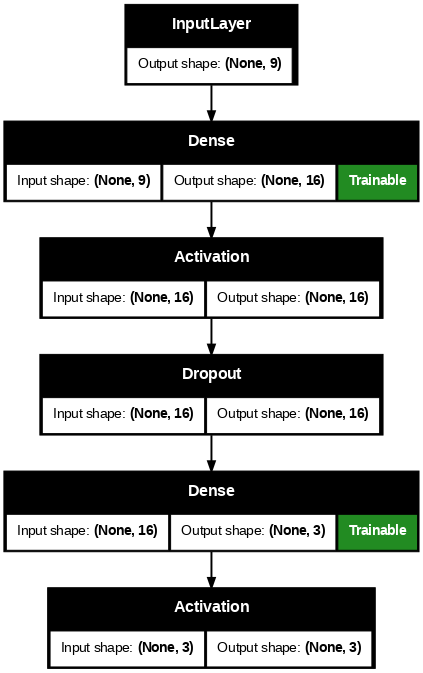

In [192]:
# Load the saved model
model = tfk.models.load_model('Penguin_Feedforward_100.0.keras')

# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Accuracy score over the train set: 1.0
Precision score over the train set: 1.0
Recall score over the train set: 1.0
F1 score over the train set: 1.0


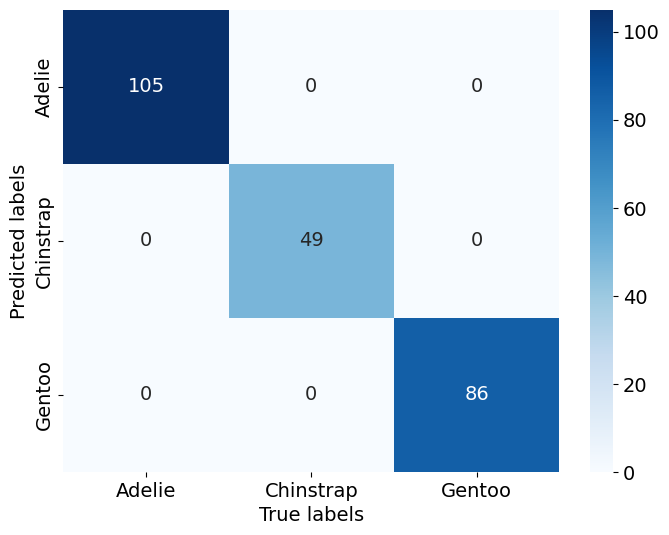

In [195]:
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the validation set: 1.0
Precision score over the validation set: 1.0
Recall score over the validation set: 1.0
F1 score over the validation set: 1.0


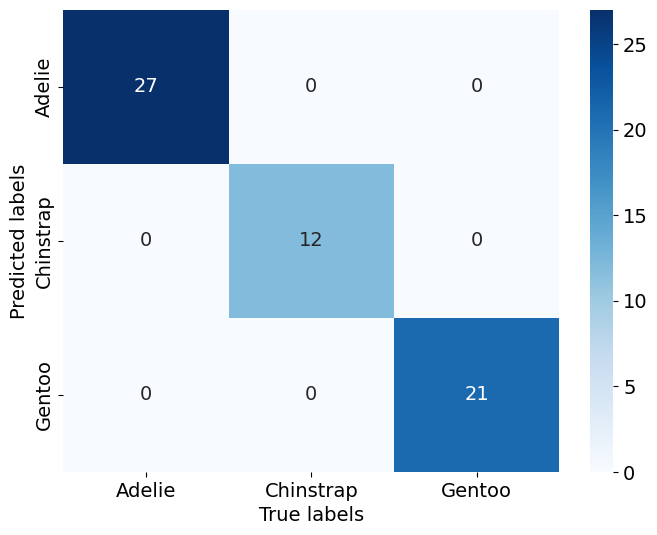

In [196]:
# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the test set: 1.0
Precision score over the test set: 1.0
Recall score over the test set: 1.0
F1 score over the test set: 1.0


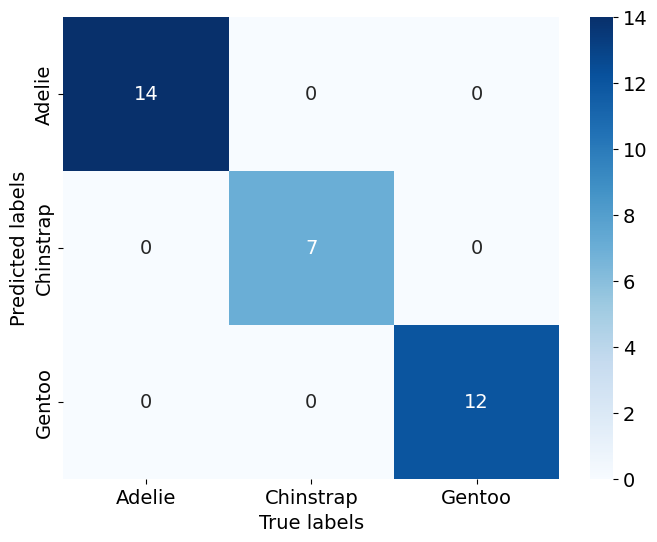

In [197]:
# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'], cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()